# The Battle Of The Neighborhoods
## Instructions
Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve. 

This capstone project will be graded by your peers. This capstone project is worth 70% of your total grade. The project will be completed over the course of 2 weeks. Week 1 submissions will be worth 30% whereas week 2 submissions will be worth 40% of your total grade.

## Week 1
### Review Criteria
For the first week, you will required to submit the following:

1. A description of the problem and a discussion of the background. (15 marks)
2. A description of the data and how it will be used to solve the problem. (15 marks)

## Week 2
### Review Criteria
For the second week, the final deliverables of the project will be:

1. A link to your Notebook on your Github repository, showing your code. (15 marks)
2. A full report consisting of all of the following components (15 marks):
    * Introduction where you discuss the business problem and who would be interested in this project.
    * Data where you describe the data that will be used to solve the problem and the source of the data.
    * Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
    * Results section where you discuss the results.
    * Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
    * Conclusion section where you conclude the report.
3. Your choice of a presentation or blogpost. (10 marks)

## 1. Introduction/Business Problem:
A client is looking to open an Bakery in Toronto called "Get Baked". They are looking to open it in a location where there are no other Bakeries around, if possible. They are looking to you for your expertise as you are a Data Scientist and are hoping that your report for them makes sense and meets the criteria that they have set.

## 2. Data
In order to acheive what the client is wanting, I will be connecting Postal Codes data with Geographical Coordinates data and then using Foursquare to help me in planning out where to place the Bakery. I will also be using libraries imported in such as Folium in order to plot the data out on a map. These libraries will have comments on them to describe what they are for when imported. After getting all of this data using Python, I will be cleaning it up, connecting it together, and creating graphical charts and KMeans Clustering to make sure the data is all set up to find out how to answer the Business Problem at hand.

Toronto Postal Code Data: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

Toronto Geographical Coordinates Data: https://cocl.us/Geospatial_data

Foursquare

## 3. Methodology
In order to manipulate the raw data, I utilized the skills learned throughout all 9 of the courses for the IBM Data Science Professional Certificate to pull the raw data from the websites and load them into a data frame using the Pandas repository. After doing so I utilized Folium to create multiple graphs to show the data visually to help me get a better understanding of what I was working with in the city of Toronto. I then created algorithms to help with getting the Venues from the data and merged all of the tables together to use KMeans Clustering in finding which cluster would be the best place to put a Bakery.

## 4. Results
Comparing the results and different clusters, it appears that one of the 6 different clusters stands out among the rest as far as Bakery Frequency. The other clusters vary in size and all seem to have at least one Bakery around.

## 5. Discussion
When comparing the clusters, is it really a good thing to place a Bakery where there are none around? Is there a reason for this? Should we maybe change our criteria and find out what is causing there to be no bakeries around? Will we make money here with a new Bakery or will it fail?

## 6. Conclusion
Out of the 6 different clusters, only one of the clusters (Cluster 3) has results where there are no Bakeries at all. Judging by this it appears that anywhere in this cluster it would be the best area to put a Bakery as our client is wanting to place the bakery in an area where no other bakeries are located if possible.

### Install And Import Required Libraries

In [1]:
# Install Geopy And Folium To Import Their Libraries
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes

# Install BeautifulSoup And LXML
!pip install beautifulsoup4
!pip install lxml

# Import Library To Handle Requests
import requests 
# Import Library For Data Analsysis
import pandas as pd 
# Import Library To Handle Data In A Vectorized Manner
import numpy as np 
# Import Library For Random Number Generation
import random
# Import Libraries For Plotting
import folium
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Module To Convert An Address Into Latitude And Longitude Values
from geopy.geocoders import Nominatim 
# Libraries For Displaying Images
from IPython.display import Image
from IPython.display import display_html
from IPython.core.display import HTML     
# Tranforming JSON File Into A Pandas Dataframe Library
from pandas.io.json import json_normalize
# Data Cleanup
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

### Scrape Data On Webpage To Get Canada Postal Codes Table

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighborhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


### Convert HTML Table To Pandas Dataframe

In [3]:
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### Data Preprocessing And Cleaning

In [4]:
# Dropping The Rows Where Borough Is 'Not assigned'
df1 = df[df.Borough != 'Not assigned']

df1.rename(columns={'Postal Code':'PostalCode'},inplace=True)
# Combining The Neighborhoods With Same PostalCode
df2 = df1.groupby(['PostalCode','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)

# Replacing The Name Of The Neighborhoods Which Are 'Not Assigned' With Names Of Borough
df2['Neighborhood'] = np.where(df2['Neighborhood'] == 'Not assigned',df2['Borough'], df2['Neighborhood'])

df2

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [5]:
# Shape Of Data Frame
df2.shape

(103, 3)

### Import CSV File With Geographical Coordinates In Canada

In [6]:
coordinates = pd.read_csv('https://cocl.us/Geospatial_data')
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Merge Both Tables And Re-Index To Show The Amount Of Boroughs And Neighborhoods In Toronto

In [7]:
coordinates.rename(columns={'Postal Code':'PostalCode'},inplace=True)
df3 = pd.merge(df2,coordinates,on='PostalCode')
df3.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [8]:
df3 = df3.reindex(columns=['PostalCode','Borough','Neighborhood','Latitude','Longitude'])
df3

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(df3['Borough'].unique()), df3.shape[0]))

The dataframe has 10 boroughs and 103 neighborhoods.


### Make Connection To Foursquare

In [10]:
# The code was removed by Watson Studio for sharing.

Foursquare connection established.


### Define Variables For Foursquare Search

In [11]:
address = 'Toronto, CA'
LIMIT = 100
radius = 1000

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Create URL Using Variables

In [12]:
print('Querying venues within a ' + str(radius) + ' metre radius of Toronto, ON, Canada.')
# Create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, radius, LIMIT)
url

Querying venues within a 1000 metre radius of Toronto, ON, Canada.


'https://api.foursquare.com/v2/venues/explore?&client_id=2PWWEO0SXOOC2CK4DV3F1SF05LOIEJE2QLUKPPFXVNEEFSK0&client_secret=VBLPWC1QJGYGT0ZOVLKZZ2ZVGHRMORLZLEETCHRHAUAIKNQA&v=20200618&ll=43.6534817,-79.3839347&radius=1000&limit=100'

### Create Map To Show The Neighborhoods In Toronto

In [13]:
# Create Map
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add Markers To Map
for lat, lng, borough, neighborhood in zip(df3['Latitude'], df3['Longitude'], df3['Borough'], df3['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='red', fill=True, fill_color='#3186cc', fill_opacity=0.7, parse_html=False).add_to(map_toronto)  
    
map_toronto

### Send The GET Request And Examine The Results

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eed7458be61c9001c5070ab'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 239,
  'suggestedBounds': {'ne': {'lat': 43.66248170900001,
    'lng': -79.37151886118865},
   'sw': {'lat': 43.64448169099999, 'lng': -79.39635053881135}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
  

### Create Function To Extract Venue Categories

In [15]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Extract Venues And Filter Results To Clean Data

In [16]:
# Assign Relevant Part Of JSON To Venues
venues = results['response']['groups'][0]['items']

# Tranform Venues Into A Dataframe
nearby_venues = json_normalize(venues)

# Filter Columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Indigo,Bookstore,43.653515,-79.380696
3,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684
4,Textile Museum of Canada,Art Museum,43.654396,-79.386500


In [17]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


### Create Function To Get Nearby Venues

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # Create The API Request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # GET Request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

### Use Function To Get Toronto Venues

In [20]:
toronto_venues = getNearbyVenues(names=df3['Neighborhood'], latitudes=df3['Latitude'], longitudes=df3['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [21]:
print(toronto_venues.shape)
toronto_venues.head()

(6877, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Donalda Golf & Country Club,43.752816,-79.342741,Golf Course
2,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
3,Parkwoods,43.753259,-79.329656,LCBO,43.757774,-79.314257,Liquor Store
4,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café


### Count Toronto Venues By Neighborhood

In [22]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,61,61,61,61,61,61
"Alderwood, Long Branch",46,46,46,46,46,46
"Bathurst Manor, Wilson Heights, Downsview North",41,41,41,41,41,41
Bayview Village,17,17,17,17,17,17
"Bedford Park, Lawrence Manor East",78,78,78,78,78,78
Berczy Park,100,100,100,100,100,100
"Birch Cliff, Cliffside West",11,11,11,11,11,11
"Brockton, Parkdale Village, Exhibition Place",100,100,100,100,100,100
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",100,100,100,100,100,100


In [23]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 347 uniques categories.


### Group Venues By Neighborhood

In [24]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(6877, 347)


,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,...,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,Agincourt,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
1,"Alderwood, Long Branch",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.000,0.021739,0.000000,0.000000,0.000000,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
3,Bayview Village,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.000,0.012821,0.000000,0.000000,0.000000,0.0
5,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
6,"Birch Cliff, Cliffside West",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
7,"Brockton, Parkdale Village, Exhibition Place",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
8,"Business reply mail Processing Centre, South C...",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.000000,0.000000,0.000000,0.014493,0.014493,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.000,0.000000,0.000000,0.000000,0.014493,0.0


In [26]:
toronto_grouped.shape

(99, 347)

### List Frequency By Neighborhood Of Top 6 Venues

In [27]:
num_top_venues = 6

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.18
1  Caribbean Restaurant  0.03
2  Gym / Fitness Center  0.03
3                Bakery  0.03
4  Cantonese Restaurant  0.03
5  Hong Kong Restaurant  0.03


----Alderwood, Long Branch----
              venue  freq
0  Toy / Game Store  0.07
1       Pizza Place  0.07
2       Coffee Shop  0.04
3     Grocery Store  0.04
4              Café  0.04
5              Bank  0.04


----Bathurst Manor, Wilson Heights, Downsview North----
         venue  freq
0         Park  0.12
1  Coffee Shop  0.07
2  Pizza Place  0.07
3  Gas Station  0.05
4         Bank  0.05
5  Bridal Shop  0.02


----Bayview Village----
                 venue  freq
0                 Bank  0.12
1        Grocery Store  0.12
2                Trail  0.12
3  Japanese Restaurant  0.12
4          Gas Station  0.12
5                 Park  0.12


----Bedford Park, Lawrence Manor East----
                venue  freq
0         Coffee Shop  0.08
1              Bakery  

### Create Function To Pull Most Common Venues

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Add Top 5 Most Common Venues To Dataframe By Neighborhood

In [29]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# Create Columns
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# New Dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt,Chinese Restaurant,Asian Restaurant,Coffee Shop,Caribbean Restaurant,Shopping Mall
1,"Alderwood, Long Branch",Pizza Place,Toy / Game Store,Burger Joint,Coffee Shop,Bank
2,"Bathurst Manor, Wilson Heights, Downsview North",Park,Pizza Place,Coffee Shop,Gas Station,Bank
3,Bayview Village,Gas Station,Grocery Store,Park,Trail,Japanese Restaurant
4,"Bedford Park, Lawrence Manor East",Bakery,Coffee Shop,Italian Restaurant,Sushi Restaurant,Bagel Shop


### Group Dataframe By Frequency Of Bakery

In [30]:
toronto_Bakery = toronto_grouped[["Neighborhood","Bakery"]]
toronto_Bakery.head(10)

,Neighborhood,Bakery
0,Agincourt,0.032787
1,"Alderwood, Long Branch",0.021739
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.076923
5,Berczy Park,0.020000
6,"Birch Cliff, Cliffside West",0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.040000
8,"Business reply mail Processing Centre, South C...",0.040000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000


In [31]:
toronto_Bakery.max()

Neighborhood    York Mills, Silver Hills
Bakery                         0.0769231
dtype: object

### Merge Neighborhood And Longitude/Latitude Dataframe With Foursquare Data

In [32]:
# Merge
toronto_Bakery_merged = pd.merge(df3, toronto_Bakery, on='Neighborhood')
toronto_Bakery_merged = toronto_Bakery_merged.reindex(columns=['PostalCode','Borough','Neighborhood','Bakery','Latitude','Longitude'])

toronto_Bakery_merged.head()

,PostalCode,Borough,Neighborhood,Bakery,Latitude,Longitude
0,M3A,North York,Parkwoods,0.00,43.753259,-79.329656
1,M4A,North York,Victoria Village,0.00,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",0.02,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",0.00,43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0.01,43.662301,-79.389494


### Construct Bar Graph Of The Frequency Of Bakeries Per Borough Of Toronto

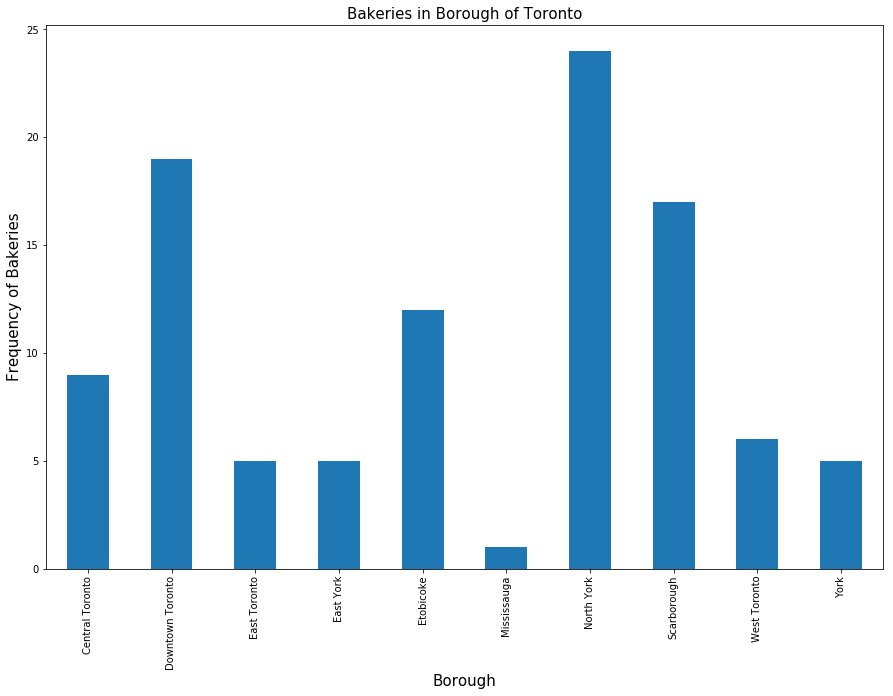

In [33]:
fig = plt.figure(figsize=(15,10))
plt.title('Bakeries in Borough of Toronto', fontsize=15)
plt.xlabel("Borough", fontsize=15)
plt.ylabel ("Frequency of Bakeries", fontsize=15)
toronto_Bakery_merged.groupby('Borough')['Bakery'].count().plot(kind='bar')
plt.show()

### Toronto KMeans Clustering (The Elbow Method)

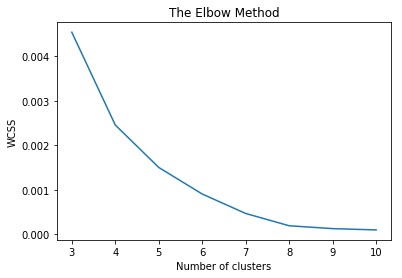

In [34]:
toronto_Bakery_Clustering = toronto_Bakery.drop('Neighborhood', 1)

wcss = []

for i in range(3, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter= 50)
    kmeans.fit(toronto_Bakery_Clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(3, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

### Toronto KMeans Clustering

In [35]:
kclusters = 6

toronto_Bakery_Clustering = toronto_Bakery.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_Bakery_Clustering)

kmeans.labels_

array([2, 5, 3, 3, 0, 5, 3, 2, 2, 3, 2, 5, 2, 1, 5, 3, 5, 3, 3, 4, 2, 4,
       1, 5, 3, 4, 2, 3, 2, 3, 5, 1, 3, 3, 3, 5, 2, 2, 4, 3, 5, 2, 4, 3,
       2, 3, 3, 4, 4, 4, 3, 4, 5, 5, 4, 2, 2, 3, 3, 3, 2, 5, 3, 1, 5, 3,
       5, 5, 3, 4, 1, 3, 3, 5, 2, 0, 5, 2, 5, 1, 2, 2, 1, 5, 3, 4, 3, 3,
       3, 2, 2, 5, 3, 1, 5, 3, 1, 3, 3], dtype=int32)

In [36]:
# Create A New Dataframe
toronto_Bakery_Clustering_merged = toronto_Bakery.copy()

toronto_Bakery_Clustering_merged["Cluster Labels"] = kmeans.labels_
toronto_Bakery_Clustering_merged.head()

,Neighborhood,Bakery,Cluster Labels
0,Agincourt,0.032787,2
1,"Alderwood, Long Branch",0.021739,5
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,3
3,Bayview Village,0.000000,3
4,"Bedford Park, Lawrence Manor East",0.076923,0


In [37]:
toronto_Bakery_Clustering_merged2 = pd.merge(df3, toronto_Bakery_Clustering_merged[['Neighborhood','Bakery', 'Cluster Labels']], on='Neighborhood')

toronto_Bakery_Clustering_merged2.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Bakery,Cluster Labels
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.00,3
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.00,3
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.02,5
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.00,3
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.01,1


In [38]:
print(toronto_Bakery_Clustering_merged2.shape)
toronto_Bakery_Clustering_merged2.sort_values(["Cluster Labels"], inplace=True)
toronto_Bakery_Clustering_merged2

(103, 7)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Bakery,Cluster Labels
90,M1W,Scarborough,"Steeles West, L'Amoreaux West",43.799525,-79.318389,0.075000,0
56,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,0.076923,0
60,M2N,North York,"Willowdale, Willowdale East",43.770120,-79.408493,0.010000,1
63,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262,0.012658,1
14,M4C,East York,Woodbine Heights,43.695344,-79.318389,0.014085,1
74,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0.010000,1
10,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.010000,1
8,M3C,North York,Don Mills,43.725900,-79.340923,0.010870,1
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.010000,1
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.010000,1


### Create Map Of Toronto Clusters

In [39]:
# Create Map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Color Scheme
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Markers
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_Bakery_Clustering_merged2['Latitude'], toronto_Bakery_Clustering_merged2['Longitude'], toronto_Bakery_Clustering_merged2['Neighborhood'], toronto_Bakery_Clustering_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Show Individual Clusters

In [40]:
# Cluster 0
toronto_Bakery_Cluster0 = toronto_Bakery_Clustering_merged2.loc[toronto_Bakery_Clustering_merged2['Cluster Labels'] == 0]
print(toronto_Bakery_Cluster0.shape)
toronto_Bakery_Cluster0

(2, 7)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Bakery,Cluster Labels
90,M1W,Scarborough,"Steeles West, L'Amoreaux West",43.799525,-79.318389,0.075000,0
56,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,0.076923,0


In [41]:
# Cluster 1
toronto_Bakery_Cluster1 = toronto_Bakery_Clustering_merged2.loc[toronto_Bakery_Clustering_merged2['Cluster Labels'] == 1]
print(toronto_Bakery_Cluster1.shape)
toronto_Bakery_Cluster1

(10, 7)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Bakery,Cluster Labels
60,M2N,North York,"Willowdale, Willowdale East",43.770120,-79.408493,0.010000,1
63,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262,0.012658,1
14,M4C,East York,Woodbine Heights,43.695344,-79.318389,0.014085,1
74,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0.010000,1
10,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.010000,1
8,M3C,North York,Don Mills,43.725900,-79.340923,0.010870,1
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.010000,1
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.010000,1
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,0.014925,1
7,M3B,North York,Don Mills,43.745906,-79.352188,0.010870,1


In [42]:
# Cluster 2
toronto_Bakery_Cluster2 = toronto_Bakery_Clustering_merged2.loc[toronto_Bakery_Clustering_merged2['Cluster Labels'] == 2]
print(toronto_Bakery_Cluster2.shape)
toronto_Bakery_Cluster2

(21, 7)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Bakery,Cluster Labels
35,M4J,East York,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,0.036585,2
55,M4M,East Toronto,Studio District,43.659526,-79.340923,0.040000,2
33,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,0.030769,2
44,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0.032258,2
49,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0.040000,2
64,M9N,York,Weston,43.706876,-79.518188,0.040816,2
67,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0.032609,2
69,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,0.030000,2
27,M2H,North York,Hillcrest Village,43.803762,-79.363452,0.038462,2
26,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.031746,2


In [43]:
# Cluster 3
toronto_Bakery_Cluster3 = toronto_Bakery_Clustering_merged2.loc[toronto_Bakery_Clustering_merged2['Cluster Labels'] == 3]
print(toronto_Bakery_Cluster3.shape)
toronto_Bakery_Cluster3

(37, 7)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Bakery,Cluster Labels
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0.0,3
50,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,0.0,3
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,0.0,3
53,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,0.0,3
54,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,0.0,3
97,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,0.0,3
59,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0.0,3
95,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,0.0,3
94,M9W,Etobicoke,"Northwest, West Humber - Clairville",43.706748,-79.594054,0.0,3
89,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,0.0,3


In [44]:
# Cluster 4
toronto_Bakery_Cluster4 = toronto_Bakery_Clustering_merged2.loc[toronto_Bakery_Clustering_merged2['Cluster Labels'] == 4]
print(toronto_Bakery_Cluster4.shape)
toronto_Bakery_Cluster4

(12, 7)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Bakery,Cluster Labels
81,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,0.049180,4
80,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,0.060000,4
79,M4S,Central Toronto,Davisville,43.704324,-79.388790,0.050000,4
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,0.062500,4
85,M1V,Scarborough,"Milliken, Agincourt North, Steeles East, L'Amo...",43.815252,-79.284577,0.050633,4
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,0.060000,4
61,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.046875,4
37,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,0.050000,4
57,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013,0.050000,4
52,M9L,North York,Humber Summit,43.756303,-79.565963,0.050000,4


In [45]:
# Cluster 5
toronto_Bakery_Cluster5 = toronto_Bakery_Clustering_merged2.loc[toronto_Bakery_Clustering_merged2['Cluster Labels'] == 5]
print(toronto_Bakery_Cluster5.shape)
toronto_Bakery_Cluster5

(21, 7)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Bakery,Cluster Labels
93,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,0.021739,5
9,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,0.026316,5
92,M5W,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,0.020000,5
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.020000,5
91,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0.020000,5
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.020000,5
86,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0.020000,5
16,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,0.022472,5
83,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0.025316,5
82,M1T,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",43.781638,-79.304302,0.020833,5
